In [3]:
import python_quant
import pandas as pd
import math

fs_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/재무제표데이터.xlsx'
fs_df = python_quant.get_finance_data(fs_path)
fr_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/재무비율데이터.xlsx'
fr_df = python_quant.get_finance_data(fr_path)
invest_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/투자지표데이터.xlsx'
invest_df = python_quant.get_finance_data(invest_path)
price_path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/가격데이터.xlsx'
price_df = pd.read_excel(price_path, index_col=0)

# 저 PBR 백테스트

In [4]:
low_pbr_st = python_quant.get_value_rank(invest_df, 'PBR', '2018/12',20)

In [5]:
low_pbr_st.head()

,PBR,PBR순위
A015760,0.30,1.0
A011210,0.31,2.5
A138930,0.31,2.5
A088350,0.33,4.0
A001430,0.34,5.5


In [6]:
code_list = []
for code in low_pbr_st.index : 
    code_list.append(code.replace('A',''))

In [7]:
price_df.head()

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,현대차,LG화학,현대모비스,셀트리온,삼성물산,삼성SDI,...,한국쉘석유,남해화학,유니드,JW홀딩스,고려제강,쌍용차,남양유업,동양,현대리바트,효성중공업
2013-12-20,28540,35300,NaN,147409,224500,294000,281500,31543,NaN,162000,...,479000,6670,41984,2096,28352,6850,930000,1540,11600,NaN
2013-12-23,28660,37000,NaN,148210,228500,291000,285000,32511,NaN,163500,...,483000,6810,42726,2092,28539,6800,918000,1550,11700,NaN
2013-12-24,28300,36750,NaN,147009,226000,294500,287000,32511,NaN,161000,...,487000,6870,43542,2067,28314,6820,935000,1540,11800,NaN
2013-12-26,28160,36000,NaN,143003,225500,296000,288500,32006,NaN,160000,...,491000,6790,43690,2117,28314,6790,938000,1500,11550,NaN
2013-12-27,27920,36650,NaN,147009,229500,295500,289000,33045,NaN,162000,...,471500,6740,44209,2192,28051,7000,925000,1455,11650,NaN


In [8]:
low_pbr_st.index

Index(['A015760', 'A011210', 'A138930', 'A088350', 'A001430', 'A002240',
       'A001230', 'A004020', 'A006120', 'A034020', 'A086790', 'A298040',
       'A004800', 'A024110', 'A003240', 'A000670', 'A034220', 'A005380',
       'A005490', 'A002380'],
      dtype='object')

In [9]:
def code_corpname(df, file_path):
    new_index = []
    code_data = pd.read_excel(file_path)
    code_data = code_data[['종목코드','기업명']]
    for num, code in enumerate(code_data['종목코드']) : 
        code = 'A' + '0'*(6-len(str(code))) + str(code)
        code_data['종목코드'][num] = code
    for i in range(0, len(df)) :
        for k in range(0, len(code_data)) : 
            if df.index[i] == code_data['종목코드'][k] : 
                new_index.append(code_data['기업명'][k])
    df.index = new_index
    return df

In [10]:
path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/KOSPI200.xlsx'

In [11]:
pbr_df = code_corpname(low_pbr_st, path)
pbr_df.head()

C:\Users\elris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\elris\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PBR,PBR순위
한국전력,0.30,1.0
현대위아,0.31,2.5
BNK금융지주,0.31,2.5
한화생명,0.33,4.0
세아베스틸,0.34,5.5


In [123]:
pbr_price = price_df[pbr_df.index]['2019-6':]
pbr_price.head(10)

,한국전력,현대위아,BNK금융지주,한화생명,세아베스틸,고려제강,동국제강,현대제철,SK디스커버리,두산중공업,하나금융지주,효성중공업,효성,기업은행,태광산업,영풍,LG디스플레이,현대차,POSCO,KCC
2019-06-03,26650,39250,7040,3275,17300,22550,6380,41150,24300,6210,36700,33200.0,74400,13900,1315000,758000,16900,138500,241500,224754
2019-06-04,26000,40100,7140,3255,17000,22250,6390,40900,24550,6400,37100,33400.0,75000,13950,1310000,743000,17000,139000,240500,234411
2019-06-05,25700,40850,7110,3185,17050,22700,6360,40650,24400,6300,37000,34000.0,76700,13850,1292000,721000,16850,141000,238500,230899
2019-06-07,25700,42650,7070,3215,16800,23800,6380,40100,24550,6310,37500,34100.0,75100,13850,1299000,719000,16650,140000,234000,229143
2019-06-10,25350,45200,7150,3210,17200,24150,6450,40850,25150,6320,37750,33950.0,75400,13950,1329000,730000,17150,143000,237000,235728
2019-06-11,26200,45550,7300,3270,17350,25050,6500,41750,25500,6510,37600,35100.0,76100,13950,1325000,734000,17500,143500,240500,236606
2019-06-12,26300,44850,7350,3270,17550,25050,6640,42200,25300,6580,37550,35900.0,75700,14000,1314000,723000,17100,141000,243500,236167
2019-06-13,26100,46150,7290,3220,17850,23450,6520,42050,25950,6640,37200,35000.0,76300,13950,1285000,757000,17100,141000,240000,237923
2019-06-14,25500,44600,7330,3225,17400,25700,6630,41700,25400,6630,37250,35400.0,76200,13950,1292000,729000,16950,140500,239000,237484
2019-06-17,25350,44900,7330,3240,17300,26150,6700,41600,25400,6600,37300,35100.0,75600,13900,1301000,726000,17050,140000,235000,234850


In [13]:
pf_stock_num = {}
stock_amount = 0

for code in pbr_price.columns : 
    try :
        temp = int(5000000 / pbr_price[code][0])
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * pbr_price[code][0]
    
    except ValueError: 
        continue
    
cash_amount = 100000000 - stock_amount

In [14]:
pf_stock_num

{'한국전력': 187,
 '현대위아': 127,
 'BNK금융지주': 710,
 '한화생명': 1526,
 '세아베스틸': 289,
 '고려제강': 221,
 '동국제강': 783,
 '현대제철': 121,
 'SK디스커버리': 205,
 '두산중공업': 805,
 '하나금융지주': 136,
 '효성중공업': 150,
 '효성': 67,
 '기업은행': 359,
 '태광산업': 3,
 '영풍': 6,
 'LG디스플레이': 295,
 '현대차': 36,
 'POSCO': 20,
 'KCC': 22}

In [15]:
stock_pf = 0

for code in pbr_price.columns : 
    stock_pf = stock_pf + pbr_price[code] * pf_stock_num[code]

In [16]:
low_pbr_backtest = pd.DataFrame({'주식포트폴리오' : stock_pf[:'2020-1']})

In [17]:
display(low_pbr_backtest.head())
display(low_pbr_backtest.tail())

,주식포트폴리오
2019-06-03,98088028.0
2019-06-04,98421192.0
2019-06-05,98160018.0
2019-06-07,98325926.0
2019-06-10,99786926.0


,주식포트폴리오
2020-01-23,89668320.0
2020-01-28,86711420.0
2020-01-29,86115580.0
2020-01-30,84395385.0
2020-01-31,83244160.0


In [18]:
cash_list = []

# 연이율 2%로 가정
for num in range(0, len(low_pbr_backtest)) : 
    cash = int(cash_amount) * math.exp(0.02 * (num/365))
    cash = round(cash,2)
    cash_list.append(cash)
    
low_pbr_backtest['현금포트폴리오'] = cash_list
display(low_pbr_backtest.head(10))
display(low_pbr_backtest.tail(10))

,주식포트폴리오,현금포트폴리오
2019-06-03,98088028.0,1911972.00
2019-06-04,98421192.0,1912076.77
2019-06-05,98160018.0,1912181.54
2019-06-07,98325926.0,1912286.32
2019-06-10,99786926.0,1912391.11
2019-06-11,101224952.0,1912495.90
2019-06-12,101275164.0,1912600.70
2019-06-13,101011786.0,1912705.50
2019-06-14,100850138.0,1912810.31
2019-06-17,100758390.0,1912915.12


,주식포트폴리오,현금포트폴리오
2020-01-16,89149270.0,1928174.16
2020-01-17,88896670.0,1928279.82
2020-01-20,88630020.0,1928385.48
2020-01-21,89095010.0,1928491.15
2020-01-22,90124370.0,1928596.82
2020-01-23,89668320.0,1928702.50
2020-01-28,86711420.0,1928808.19
2020-01-29,86115580.0,1928913.88
2020-01-30,84395385.0,1929019.58
2020-01-31,83244160.0,1929125.28


In [19]:
low_pbr_backtest['종합포트폴리오'] = low_pbr_backtest['주식포트폴리오'] + low_pbr_backtest['현금포트폴리오']
low_pbr_backtest['일변화율'] = low_pbr_backtest['종합포트폴리오'].pct_change()
# 초기 투자금 대비 변화율
low_pbr_backtest['총변화율'] = low_pbr_backtest['종합포트폴리오']/100000000 - 1

In [20]:
display(low_pbr_backtest.head(10))
display(low_pbr_backtest.tail(10))

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2019-06-03,98088028.0,1911972.00,1.000000e+08,NaN,0.000000
2019-06-04,98421192.0,1912076.77,1.003333e+08,0.003333,0.003333
2019-06-05,98160018.0,1912181.54,1.000722e+08,-0.002602,0.000722
2019-06-07,98325926.0,1912286.32,1.002382e+08,0.001659,0.002382
2019-06-10,99786926.0,1912391.11,1.016993e+08,0.014576,0.016993
2019-06-11,101224952.0,1912495.90,1.031374e+08,0.014141,0.031374
2019-06-12,101275164.0,1912600.70,1.031878e+08,0.000488,0.031878
2019-06-13,101011786.0,1912705.50,1.029245e+08,-0.002551,0.029245
2019-06-14,100850138.0,1912810.31,1.027629e+08,-0.001570,0.027629
2019-06-17,100758390.0,1912915.12,1.026713e+08,-0.000892,0.026713


,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2020-01-16,89149270.0,1928174.16,91077444.16,0.002419,-0.089226
2020-01-17,88896670.0,1928279.82,90824949.82,-0.002772,-0.091751
2020-01-20,88630020.0,1928385.48,90558405.48,-0.002935,-0.094416
2020-01-21,89095010.0,1928491.15,91023501.15,0.005136,-0.089765
2020-01-22,90124370.0,1928596.82,92052966.82,0.011310,-0.079470
2020-01-23,89668320.0,1928702.50,91597022.50,-0.004953,-0.084030
2020-01-28,86711420.0,1928808.19,88640228.19,-0.032280,-0.113598
2020-01-29,86115580.0,1928913.88,88044493.88,-0.006721,-0.119555
2020-01-30,84395385.0,1929019.58,86324404.58,-0.019537,-0.136756
2020-01-31,83244160.0,1929125.28,85173285.28,-0.013335,-0.148267


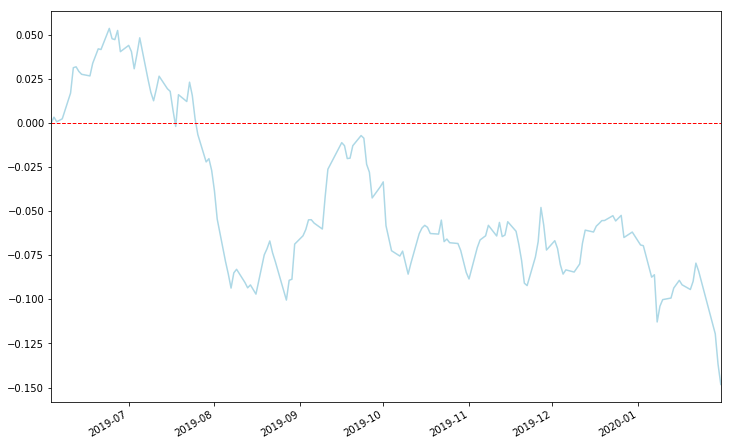

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
low_pbr_backtest['총변화율'].plot(color = 'lightblue')
plt.axhline(y = 0 , color='r', linestyle='--', linewidth=1)
plt.show()

In [99]:
def backtest_beta(price_df, strategy_df, start_date, end_date, initial_money) : 
    code_list = []
    for code in low_pbr_st.index : 
        code_list.append(code.replace('A',''))
        
    def code_corpname(df, file_path):
        new_index = []
        code_data = pd.read_excel(file_path)
        code_data = code_data[['종목코드','기업명']]
        for num, code in enumerate(code_data['종목코드']) : 
            code = 'A' + '0'*(6-len(str(code))) + str(code)
            code_data['종목코드'][num] = code
        for i in range(0, len(df)) :
            for k in range(0, len(code_data)) : 
                if df.index[i] == code_data['종목코드'][k] : 
                    new_index.append(code_data['기업명'][k])
        df.index = new_index
        return df
    
    path = 'C:/Users/elris/Dropbox/Data Scientist/Python/엑셀 데이터/KOSPI200.xlsx'
    strategy_df = code_corpname(strategy_df, path)
    
    strategy_price = price_df[strategy_df.index][start_date:end_date]
    
    pf_stock_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money/len(strategy_df)
    
    for code in strategy_price.columns : 
        try :
            temp = int(each_money / strategy_price[code][0])
            pf_stock_num[code] = temp
            stock_amount = stock_amount + temp * strategy_price[code][0]
            stock_pf = stock_pf + strategy_price[code] * pf_stock_num[code]

        except ValueError: 
            continue
    
    cash_amount = initial_money - stock_amount
    
    backtest_df = pd.DataFrame({'주식포트폴리오' : stock_pf})
    
    cash_list = []

    # 연이율 2%로 가정
    for num in range(0, len(low_pbr_backtest)) : 
        cash = int(cash_amount) * math.exp(0.02 * (num/365))
        cash = round(cash,2)
        cash_list.append(cash)
    
    backtest_df['현금포트폴리오'] = cash_list
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money - 1
   
    return backtest_df

# 저 PER 백테스트

In [100]:
strategy_date = '2018/12'
start_date = '2019-6'
end_date = '2020-1'
initial_money = 100000000

low_per = python_quant.get_value_rank(invest_df, 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)
display(per_backtest.head(10))

C:\Users\elris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\elris\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2019-06-03,99333450,666550.00,1.000000e+08,NaN,0.000000
2019-06-04,100320350,666586.52,1.009869e+08,0.009869,0.009869
2019-06-05,100400200,666623.05,1.010668e+08,0.000791,0.010668
2019-06-07,99975800,666659.58,1.006425e+08,-0.004199,0.006425
2019-06-10,101234950,666696.11,1.019016e+08,0.012511,0.019016
2019-06-11,101568200,666732.64,1.022349e+08,0.003271,0.022349
2019-06-12,101866500,666769.18,1.025333e+08,0.002918,0.025333
2019-06-13,102255450,666805.71,1.029223e+08,0.003794,0.029223
2019-06-14,101352800,666842.25,1.020196e+08,-0.008770,0.020196
2019-06-17,101531500,666878.79,1.021984e+08,0.001752,0.021984


In [101]:
price_df[start_date].iloc[0].dropna().index

Index(['삼성전자', 'SK하이닉스', '삼성바이오로직스', 'NAVER', '현대차', 'LG화학', '현대모비스', '셀트리온',
       '삼성물산', '삼성SDI',
       ...
       '한국쉘석유', '남해화학', '유니드', 'JW홀딩스', '고려제강', '쌍용차', '남양유업', '동양', '현대리바트',
       '효성중공업'],
      dtype='object', length=200)

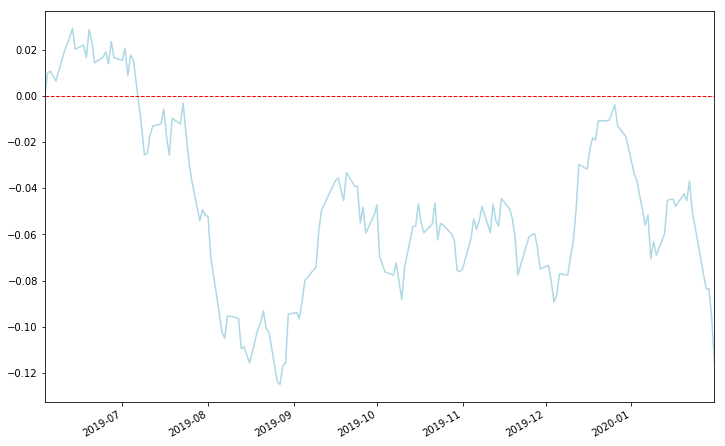

In [102]:
plt.figure(figsize = (12,8))
per_backtest['총변화율'].plot(color = 'lightblue')
plt.axhline(y = 0 , color='r', linestyle='--', linewidth=1)
plt.show()

C:\Users\elris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\elris\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


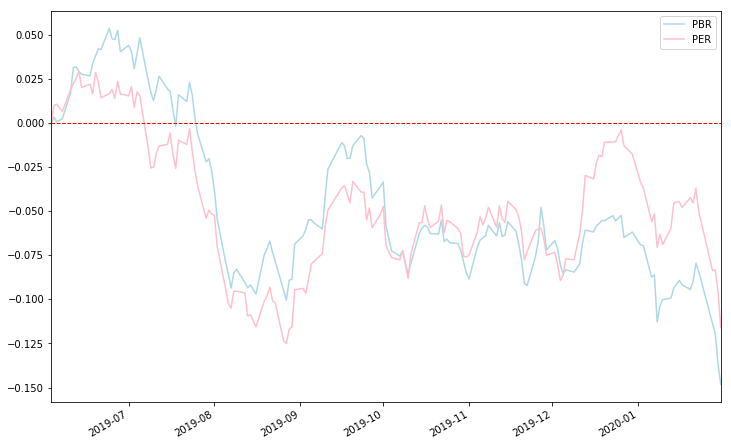

In [104]:
strategy_date = '2018/12'
start_date = '2019-6'
end_date = '2020-1'
initial_money = 100000000

low_pbr = python_quant.get_value_rank(invest_df, 'PBR', strategy_date, 20)
low_per = python_quant.get_value_rank(invest_df, 'PER', strategy_date, 20)

pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize = (12,8))
pbr_backtest['총변화율'].plot(color = 'lightblue', label = 'PBR')
per_backtest['총변화율'].plot(color = 'pink', label = 'PER')
plt.legend()
plt.axhline(y = 0 , color='r', linestyle='--', linewidth=1)
plt.show()

PBR을 하위 20%, 그 다음 20% 등으로 5개 구간으로 나누어 포트폴리오를 구성 후 수익률을 살펴봄

C:\Users\elris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\elris\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


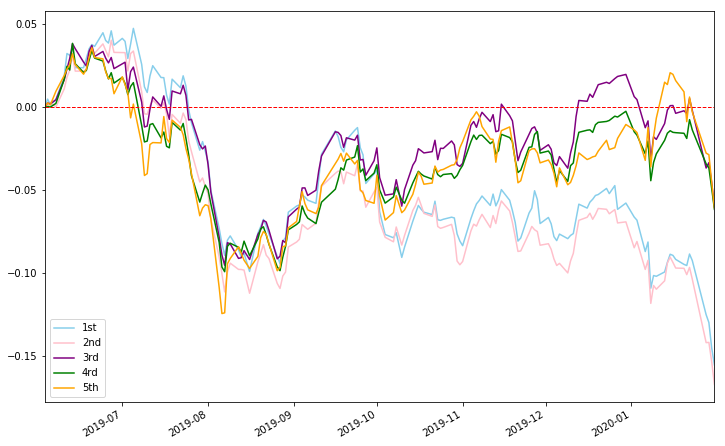

In [125]:
strategy_date = '2018/12'
start_date = '2019-6'
end_date = '2020-1'
initial_money = 100000000

all_pbr = python_quant.get_value_rank(invest_df, 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize = (12,8))
pbr_backtest1['총변화율'].plot(color = 'skyblue', label = '1st')
pbr_backtest2['총변화율'].plot(color = 'pink', label = '2nd')
pbr_backtest3['총변화율'].plot(color = 'purple', label = '3rd')
pbr_backtest4['총변화율'].plot(color = 'green', label = '4rd')
pbr_backtest5['총변화율'].plot(color = 'orange', label = '5th')
plt.legend()
plt.axhline(y = 0 , color='r', linestyle='--', linewidth=1)
plt.show()

# F-socre 백테스트

C:\Users\elris\Dropbox\Data Scientist\Python\python_quant.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fscore_df['당기순이익 점수'] = fscore_df['당기순이익'] > 0
C:\Users\elris\Dropbox\Data Scientist\Python\python_quant.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fscore_df['영업현금흐름 점수'] = fscore_df['영업활동으로인한현금흐름'] > 0
C:\Users\elris\Dropbox\Data Scientist\Python\python_quant.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

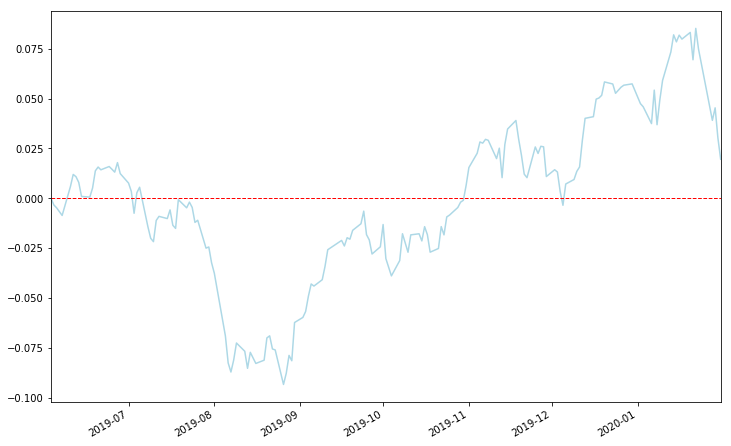

In [121]:
strategy_date = '2018/12'
start_date = '2019-6'
end_date = '2020-1'
initial_money = 100000000

f_score = python_quant.get_fscore(fs_df, strategy_date, 20)
f_score_backtest = backtest_beta(price_df, f_score, start_date, end_date, initial_money)

plt.figure(figsize = (12,8))
f_score_backtest['총변화율'].plot(color = 'lightblue')
plt.axhline(y = 0 , color='r', linestyle='--', linewidth=1)
plt.show()

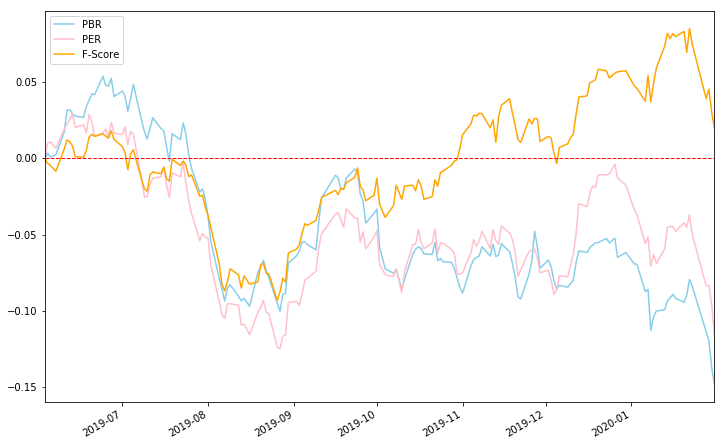

In [122]:
plt.figure(figsize = (12,8))
pbr_backtest['총변화율'].plot(color = 'skyblue', label = 'PBR')
per_backtest['총변화율'].plot(color = 'pink', label = 'PER')
f_score_backtest['총변화율'].plot(color = 'orange', label = 'F-Score')
plt.legend()
plt.axhline(y = 0 , color='r', linestyle='--', linewidth=1)
plt.show()